

# Project: Investigate a Dataset (Gapminder Word)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This investigation is about how people live their lives in different countries, tracked across the years, and on a number of different indicators. In this case we are going to investigate the following indicators: BMI,GDP per capita, GNI per capita, life expectancy, health expendeture per GDP and Choresterol in blood for the following countries:
- United States , Canada, France, Spain, Australia,Mozambique, Mali, Madagascar, Malawi and Rwanda 

> The question we are going to adress are the fllowing:
- In general, Is there any trend in this indicators?
- Is there any difference by gender in choresterol and BMI contents?
- Is there any realtion between Health Expendeture and Life Expectancy?

> For this project I used different sources of information: www.gapminder.com for download the datasets, https://pandas.pydata.org to find funcionalities of the pandas packages and https://es.stackoverflow.com to consult several matter regarding ploting and data cleanning

In [6]:
# set up import statements for all of the packages that we are going to use


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

The datasets were downloaded from www.gapminder.org in Excel format.

- Firstly the files were converted to CSV format in order to manipulate the data in python.
- After that, I created a dataframe for each indicator before merging all together

The indcators which are going to be analyzed are the following,

- **BMI male:** The mean BMI (Body Mass Index) of the male population, counted in kilogram per square meter; this mean is calculated as if each country has the same age composition as the world population.

- **BMI female:** The mean BMI (Body Mass Index) of the female population, counted in kilogram per square meter; this mean is calculated as if each country has the same age composition as the world population.

- **GDP per capita:** Gross Domestic Product per capita in constant 2000 US$. The inflation but not the differences in the cost of living between countries has been taken into account.

- **GNI per capita:** Gross National Income (GNI) per capita at purchasing power parity (PPP) in international dollars

- **Life expectancy:** The average number of years a newborn child would live if current mortality patterns were to stay the same.

- **Health expendeture:** Total expenditure on health as percentage of gross domestic product.

- **Cholesterol male:** The mean TC (Total Cholesterol) of the male population, counted in mmol per L; this mean is calculated as if each country has the same age composition as the world population.

- **Cholesterol female:** The mean TC (Total Cholesterol) of the male population, counted in mmol per L; this mean is calculated as if each country has the same age composition as the world population.


In [7]:
data_sets= {'BMI_male':"Indicator_BMI male ASM.csv",
      'BMI_female':"Indicator_BMI female ASM.csv",
      'GDP_percap':"GDPpercapitaconstant2000US.csv",
      'GNI_percap':"indicatorGNIpercapitaPPP.csv",
      'life_expectancy':"indicator life_expectancy_at_birth.csv",
      'health_expen':"indicator total health expenditure perc of GDP.csv",
      'Chorest_female':"Indicator_Choresterol female ASM.csv",
      'Chorest_male':"Indicator_Choresterol male ASM.csv"}
  

    
    
# To load all the datasets into dataframes
df_BMI_male = pd.read_csv (data_sets['BMI_male'],sep =';', encoding = "ISO-8859-1")
df_BMI_female = pd.read_csv (data_sets['BMI_female'],sep =';', encoding = "ISO-8859-1")
df_GDP_percap = pd.read_csv (data_sets['GDP_percap'],sep =';', encoding = "ISO-8859-1")
df_GNI_percap = pd.read_csv (data_sets['GNI_percap'],sep =';', encoding = "ISO-8859-1")
df_life_expectancy = pd.read_csv (data_sets['life_expectancy'],sep =';', encoding = "ISO-8859-1")
df_health_expen = pd.read_csv (data_sets['health_expen'],sep =';', encoding = "ISO-8859-1")
df_Chorest_female = pd.read_csv (data_sets['Chorest_female'],sep =';', encoding = "ISO-8859-1")
df_Chorest_male = pd.read_csv (data_sets['Chorest_male'],sep =';', encoding = "ISO-8859-1")




### Data Cleaning

All the datasets are organized by the following columns to make it easier for the investigation and merging: Country, Year, "Indicators". And after that, we merge all the diferent indicator in the same data frame 

In [8]:
#it is started by BMI dataframes

df_BMI_male_order=pd.melt(df_BMI_male, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "BMI_male"})
df_BMI_female_order=pd.melt(df_BMI_female, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "BMI_female"})

# the two dataframes BMI are merged by inner join
df_BMI = pd.merge(df_BMI_male_order, df_BMI_female_order, on=['Country', 'Year'])

In [9]:
#after that we continue with the rest of them

df_GDP_percap_order=pd.melt(df_GDP_percap, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "GDP_percap"})
df_BMI_GDP = pd.merge(df_BMI, df_GDP_percap_order, on=['Country', 'Year'])

df_GNI_percap_order=pd.melt(df_GNI_percap, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "GNI_percap"})
df_BMI_GDP_GNI = pd.merge(df_BMI_GDP, df_GNI_percap_order, on=['Country', 'Year'])

df_GNI_percap_order=pd.melt(df_life_expectancy, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "life_expectancy"})
df_BMI_GDP_GNI_life = pd.merge(df_BMI_GDP_GNI, df_GNI_percap_order, on=['Country', 'Year'])

df_health_expen_order=pd.melt(df_health_expen, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "health_expen_perGDP"})
df_BMI_GDP_GNI_life_health = pd.merge(df_BMI_GDP_GNI_life, df_health_expen_order, on=['Country', 'Year'])

df_Chorest_female_order=pd.melt(df_Chorest_female, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "Chorest_female"})
df_Chorest_male_order=pd.melt(df_Chorest_male, id_vars=['Country']).rename(index=str, columns={"variable" : "Year", "value": "Chorest_male"})
df_Chorest = pd.merge(df_Chorest_female_order, df_Chorest_male_order, on=['Country', 'Year'])


df_BMI_GDP_GNI_life_health_Chorest = pd.merge(df_BMI_GDP_GNI_life_health, df_Chorest, on=['Country', 'Year'])

# df_BMI_GDP_GNI_life_health_Chorest contains all the variables we want to investigate 

Since we have too many countries in this dataset, we are going to select 10, 5 within the GNITop30 and 5 within GNIBotton 30

In [10]:
#print the list of country in order to select the countries for investigation 

print(df_BMI_GDP_GNI_life_health_Chorest.groupby(['Country'])["GNI_percap"].max().sort_values(ascending=False).head(n=30))
print(df_BMI_GDP_GNI.groupby(['Country'])["GNI_percap"].max().sort_values(ascending=False).tail(n=30))

Country
Qatar                   74220.0
United Arab Emirates    68980.0
Luxembourg              67990.0
Norway                  61060.0
Kuwait                  58310.0
Singapore               53280.0
Brunei                  51940.0
Macao, China            49180.0
United States           47320.0
Hong Kong, China        46240.0
Switzerland             43550.0
Netherlands             42000.0
Sweden                  41000.0
Denmark                 40460.0
Austria                 39700.0
Ireland                 39440.0
Canada                  38490.0
Finland                 38280.0
Germany                 37590.0
Belgium                 37560.0
United Kingdom          36670.0
Australia               35920.0
Iceland                 35320.0
Japan                   34700.0
France                  34640.0
Italy                   33010.0
Bahamas                 32700.0
Spain                   32270.0
Cyprus                  29790.0
Greece                  28600.0
Name: GNI_percap, dtype: float64

As mentioned, we are going to select the following countries 
- United States , Canada, France, Spain and Australia,
- Mozambique, Mali, Madagascar, Malawi and Rwanda 

Then we create a data frame with only those countries

In [11]:
# I am going to create a list of countries in order to be used in further operations.

country_top = ['United States', 'Canada', 'France', 'Spain', 'Australia']
country_botton = ['Mozambique', 'Mali', 'Madagascar', 'Malawi' ,'Rwanda']
countries = country_top + country_botton

In [12]:
# A new dataframe is created with the selected countries
df_countries = df_BMI_GDP_GNI_life_health_Chorest[df_BMI_GDP_GNI_life_health_Chorest['Country'].isin(countries)]
# Check the result of the 5 first rows
df_countries.head()

,Country,Year,BMI_male,BMI_female,GDP_percap,GNI_percap,life_expectancy,health_expen_perGDP,Chorest_female,Chorest_male
8,Australia,1995,26.29,25.47974,18690.44,20140.0,78.3,7.2,5.483604,5.466947
32,Canada,1995,26.59,25.58741,20169.54,21900.0,78.0,9.0,5.387396,5.334204
58,France,1995,25.17,24.51697,19478.18,20190.0,78.2,10.4,5.592029,5.661132
100,Madagascar,1995,21.04,20.52204,244.69,680.0,57.2,2.8,4.430267,4.279596
101,Malawi,1995,21.05,21.49245,145.64,490.0,46.9,4.9,4.331042,4.187644


Once we have create the df_countries, I have to check wehter there is any NaN in order to clean the dataset accordingly

In [13]:
df_countries.isnull().sum()

Country                0
Year                   0
BMI_male               0
BMI_female             0
GDP_percap             0
GNI_percap             0
life_expectancy        0
health_expen_perGDP    0
Chorest_female         0
Chorest_male           0
dtype: int64

Then I have to check whether there is any outlier or something strange in the data

In [14]:
# print summary for all the countries 
for entry in countries:
    print (entry)
    print(df_countries[df_countries['Country']==entry].describe())
    print('--------------------------------------------------')


United States
        BMI_male  BMI_female    GDP_percap    GNI_percap  life_expectancy  \
count  14.000000   14.000000     14.000000     14.000000        14.000000   
mean   27.842857   27.672049  35084.068571  37427.857143        77.150000   
std     0.415793    0.465497   2842.245423   6581.468364         0.677949   
min    27.180000   26.922400  30050.990000  27550.000000        75.900000   
25%    27.525000   27.309323  33148.852500  32467.500000        76.825000   
50%    27.855000   27.699305  35272.065000  36765.000000        77.000000   
75%    28.175000   28.048427  37521.355000  42547.500000        77.600000   
max    28.460000   28.343590  38710.890000  47320.000000        78.300000   

       health_expen_perGDP  Chorest_female  Chorest_male  
count            14.000000       14.000000     14.000000  
mean             14.643041        5.297742      5.237960  
std               1.232107        0.094141      0.098332  
min              13.350613        5.149762      5.071318

It looks like there is no NaN or strange data

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Is there any trend in these indicators?

In order to have a quick look, I am going to print all the indicator by country. Indicator vs Year

Text(0,0.5,'mmol/L')

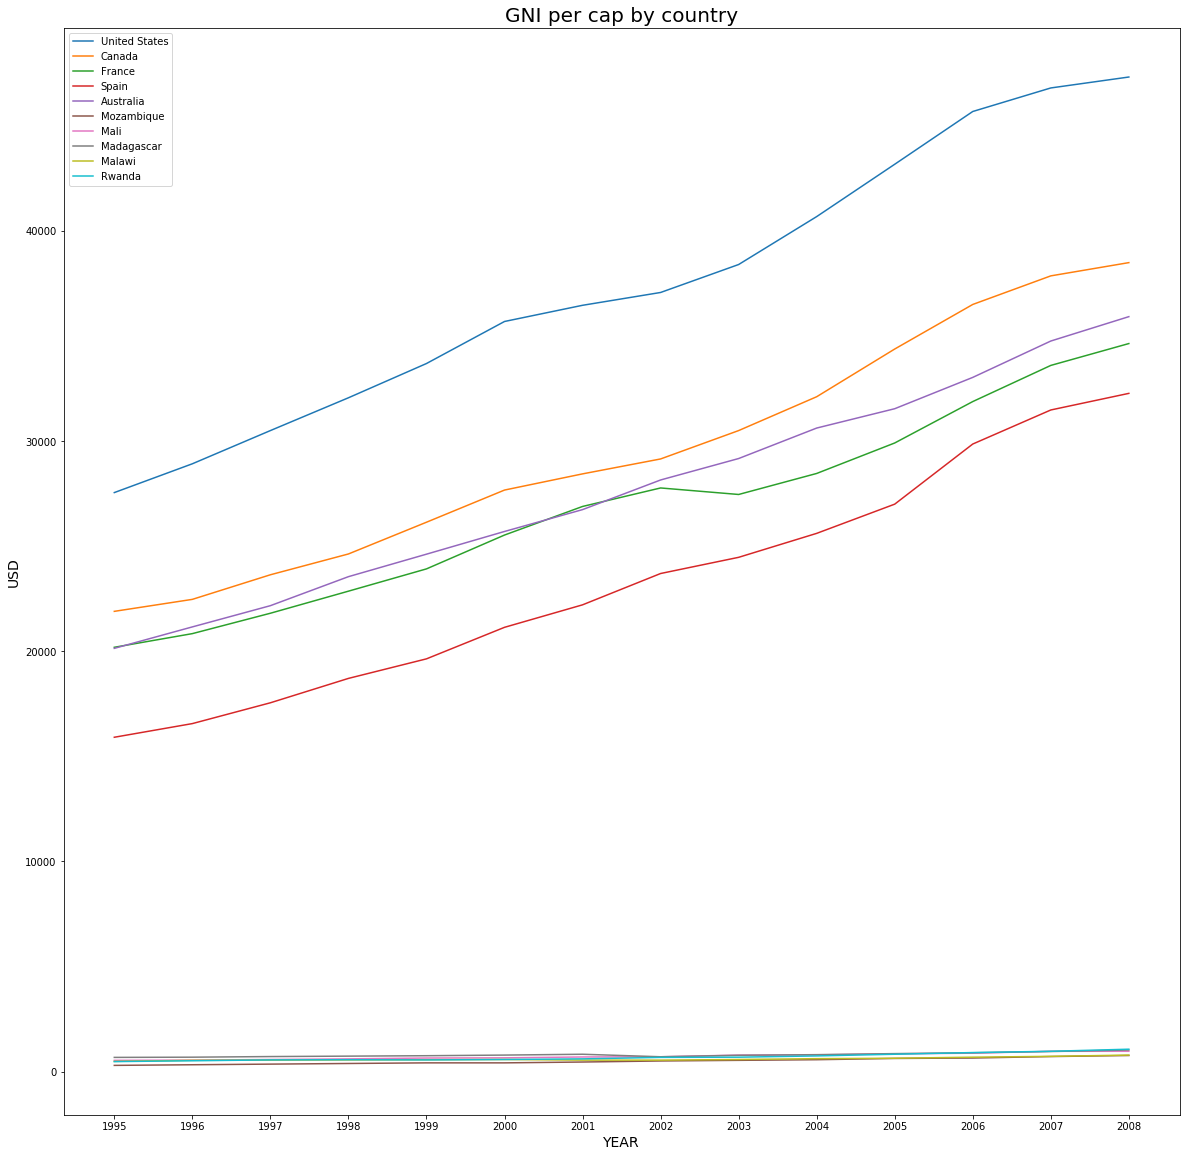

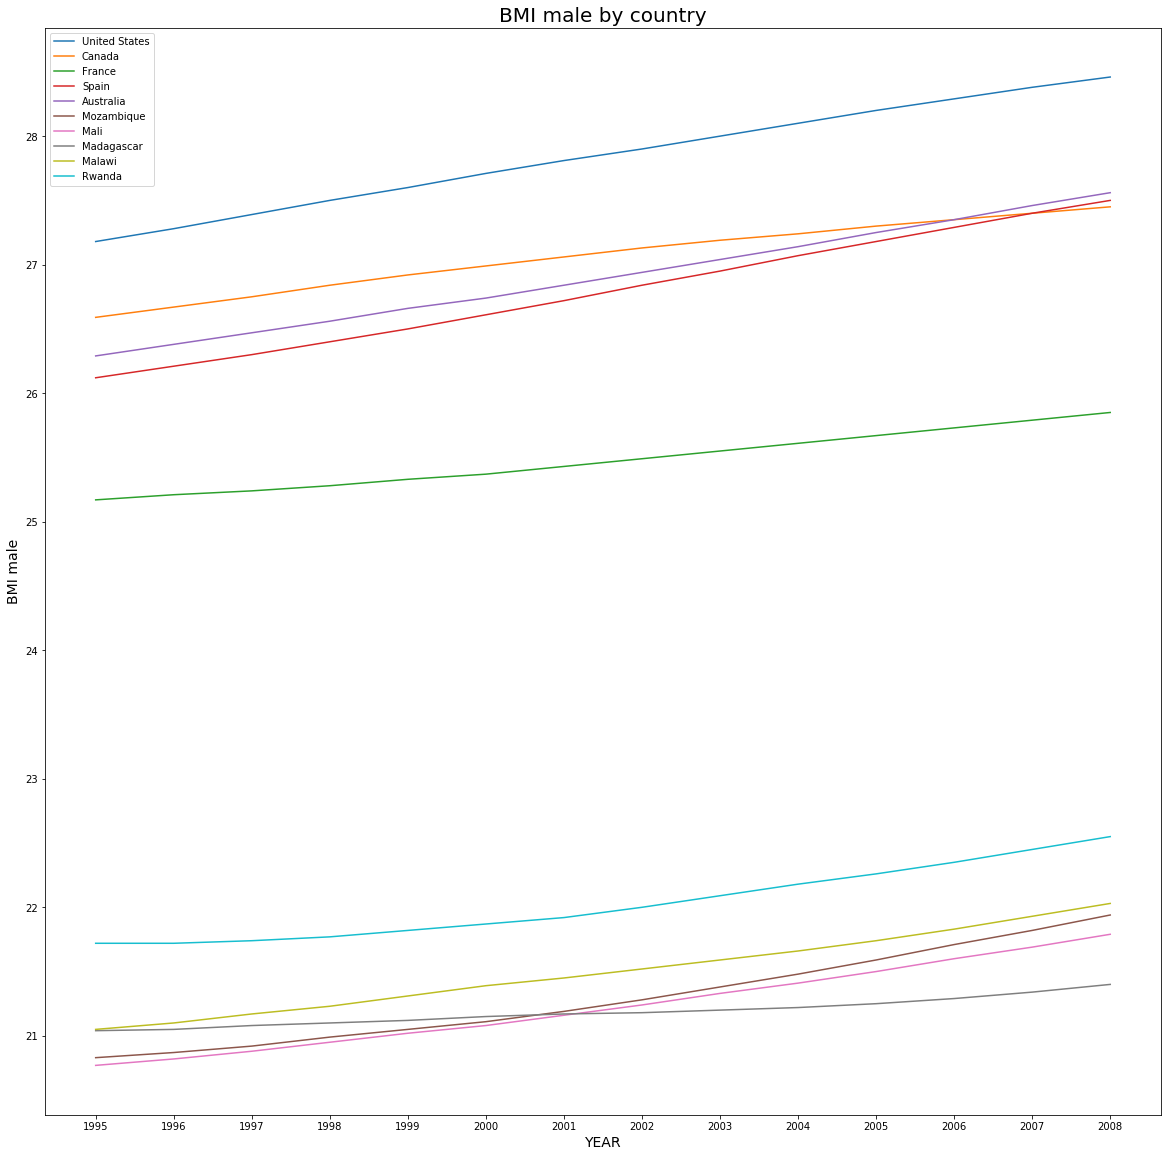

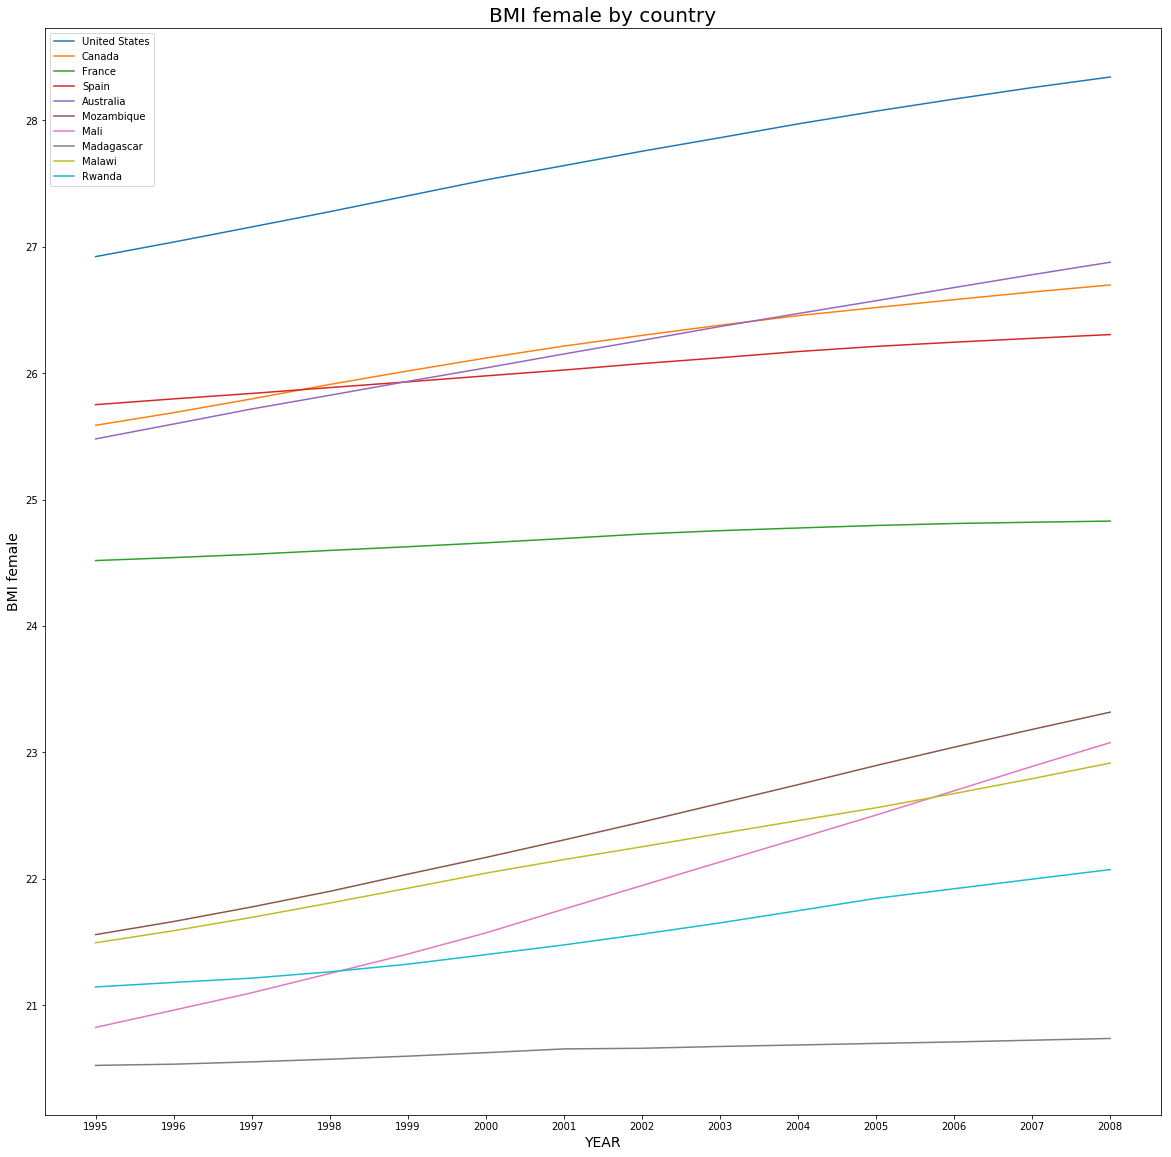

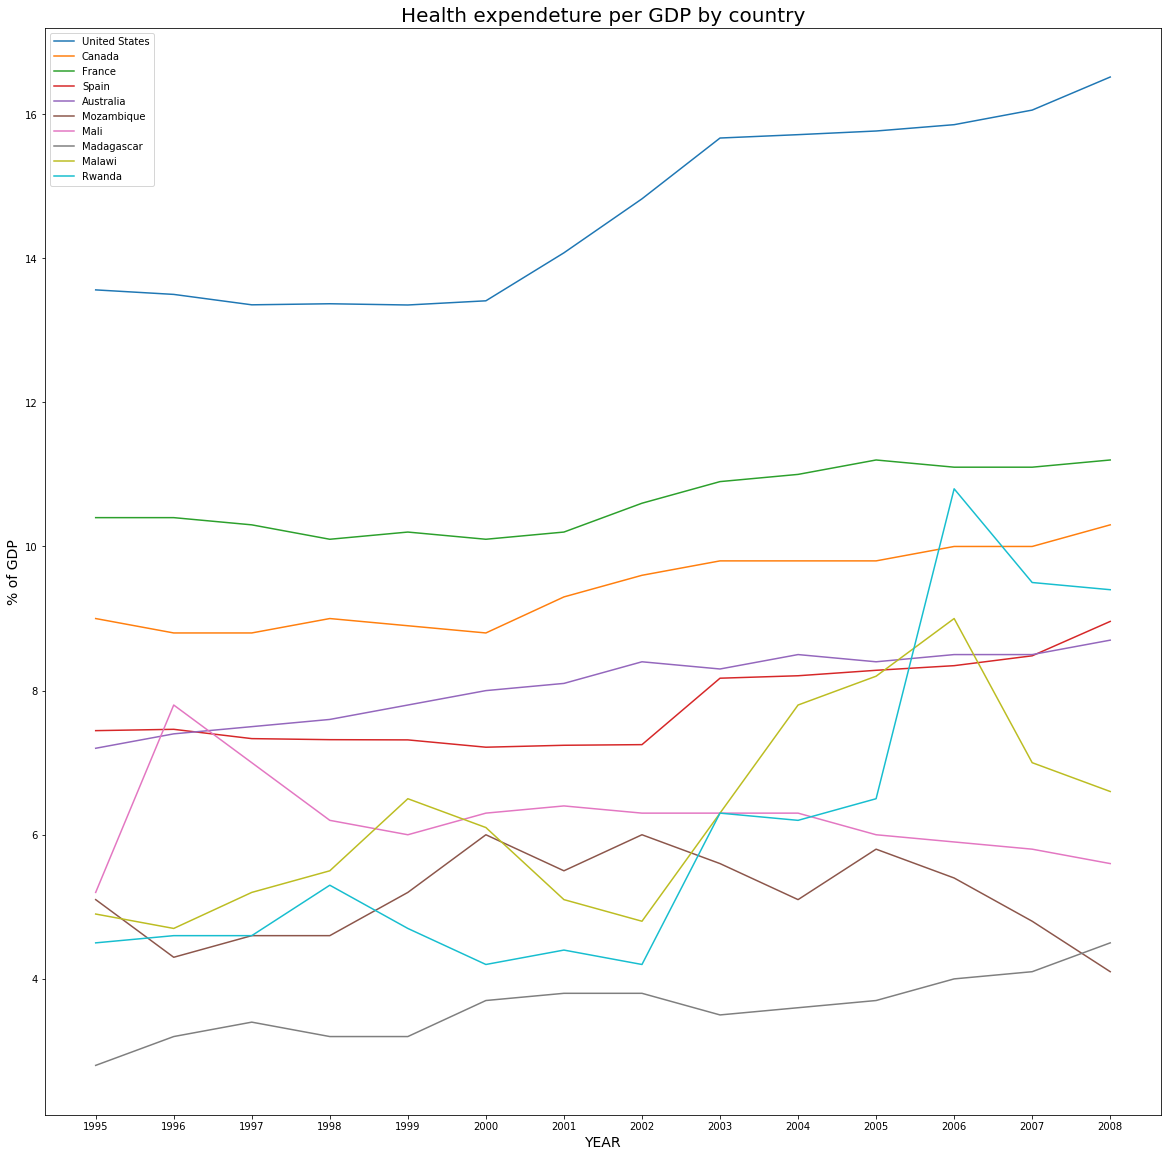

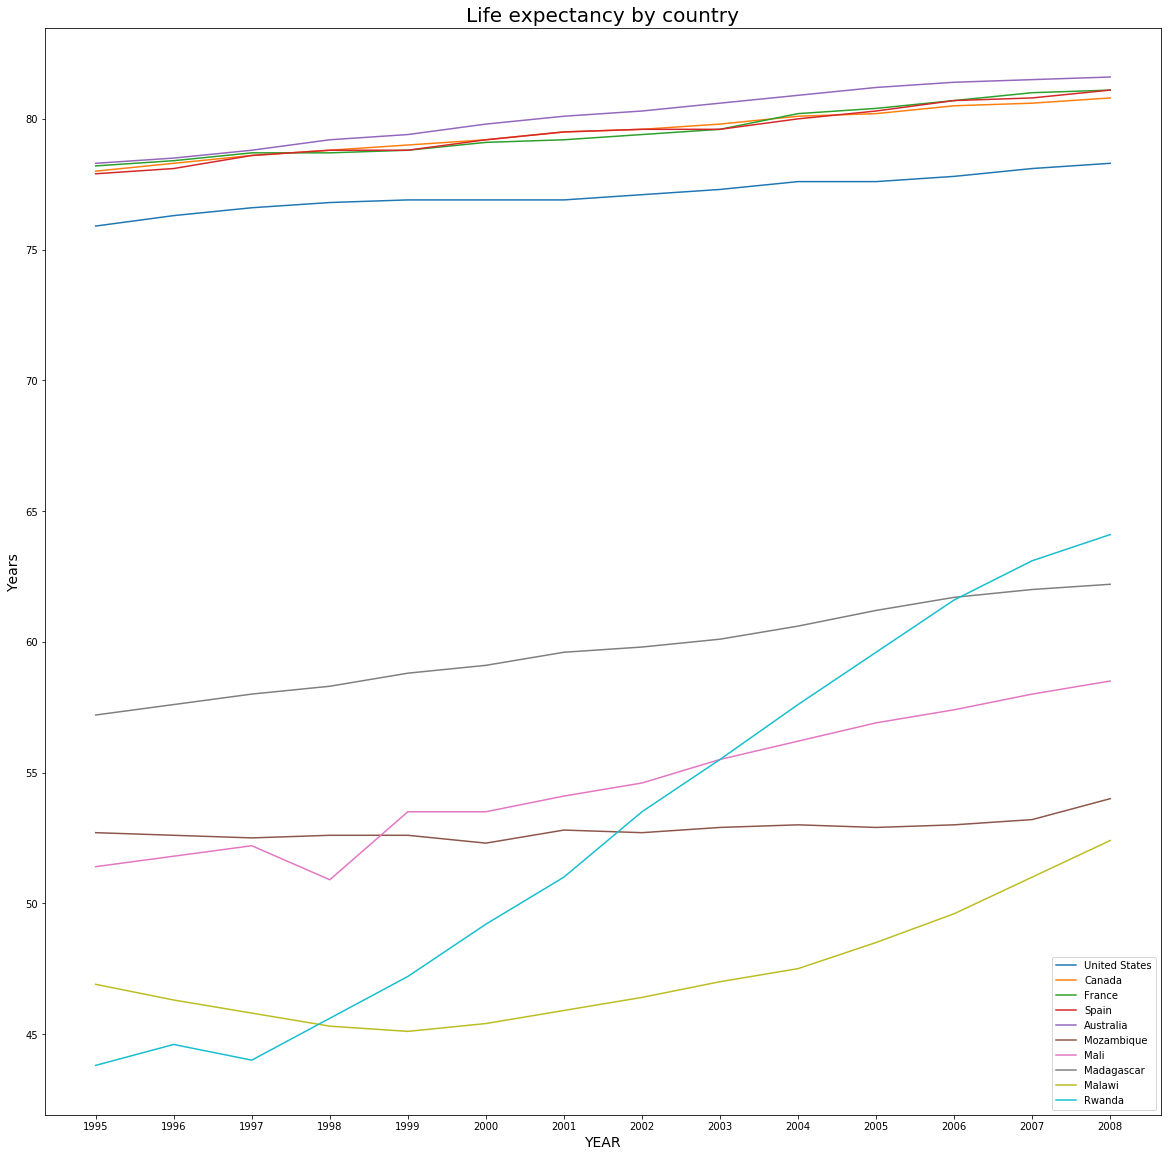

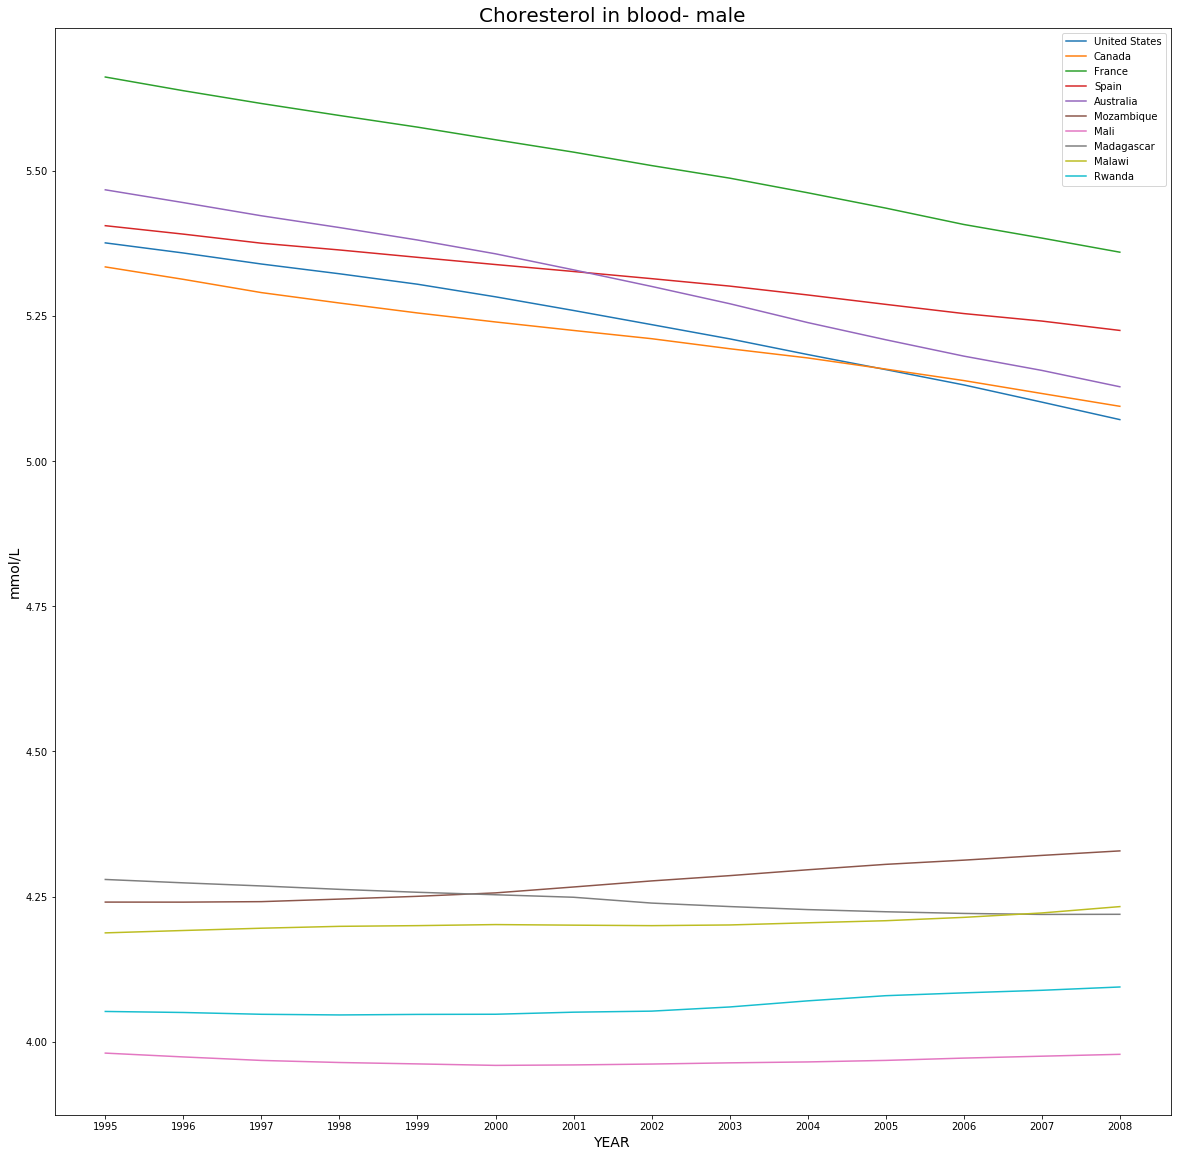

In [15]:
plt.figure(figsize=(20,20))
for e in countries:
    plt.plot(df_countries[df_countries['Country']== e]['Year'],df_countries[df_countries['Country']== e]['GNI_percap'] )
plt.legend(countries)
plt.title('GNI per cap by country', fontsize=20)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('USD', fontsize=14)


plt.figure(figsize=(20,20))
for e in countries:
    plt.plot(df_countries[df_countries['Country']== e]['Year'],df_countries[df_countries['Country']== e]['BMI_male'] )
plt.legend(countries)
plt.title('BMI male by country', fontsize=20)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('BMI male', fontsize=14)

plt.figure(figsize=(20,20))
for e in countries:
    plt.plot(df_countries[df_countries['Country']== e]['Year'],df_countries[df_countries['Country']== e]['BMI_female'] )
plt.legend(countries)
plt.title('BMI female by country', fontsize=20)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('BMI female', fontsize=14)

plt.figure(figsize=(20,20))
for e in countries:
    plt.plot(df_countries[df_countries['Country']== e]['Year'],df_countries[df_countries['Country']== e]['health_expen_perGDP'] )
plt.legend(countries)
plt.title('Health expendeture per GDP by country', fontsize=20)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('% of GDP', fontsize=14)

plt.figure(figsize=(20,20))
for e in countries:
    plt.plot(df_countries[df_countries['Country']== e]['Year'],df_countries[df_countries['Country']== e]['life_expectancy'] )
plt.legend(countries)
plt.title('Life expectancy by country', fontsize=20)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('Years', fontsize=14)

plt.figure(figsize=(20,20))
for e in countries:
    plt.plot(df_countries[df_countries['Country']== e]['Year'],df_countries[df_countries['Country']== e]['Chorest_male'] )
plt.legend(countries)
plt.title('Choresterol in blood- male', fontsize=20)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('mmol/L', fontsize=14)




- **GNI per cap by country:** The trend is to increase year by year with similar slope; although is not really significant in the botton30 contries which is almost flat.

- **BMI male by country:** The trend is to increase year by year in all the countries. Can be observed that the top30 countries has a higher level of BMI in comparation with the botton30.

- **BMI female by country:** Same as BMI male.

- **Health expendeture per GDP by country:** In general the trend is to increase year by year although the behaviour for the botton30 is a little bit anarchic. The range for all the countries (Except USA) are between 5-10% of the GPD. We can observe that USA is spending significantly more than the rest.

- **Life expectancy by country:** The trend is to increase year by year in all the countries. we can also observe that there  is a big difference between the top30 and botton30. The values in the top30 are pretty similar (USA a bit lower) while the values in the top 30 differ significantly

- **Cholesterol in blood- male:** In the Top30 the trend is to decrease year by year and in the Botton30 the trend is to increase  or to remain flat year by year. Again we can observe that as higher GDP more Chorest in blood

We can also conclude that there is a big gap in all the indicator between the top and botton contries

### Question 2: Is there any difference by gender in cholesterol and BMI contents?

In order to investigate this question, I am going to make some bar chart comparing the BMI male/female and Cholesterol male/female in all the countries for two different years (1997, 2008). I am going to use the pandas plot function plot() 


Let's start with BMI indicator

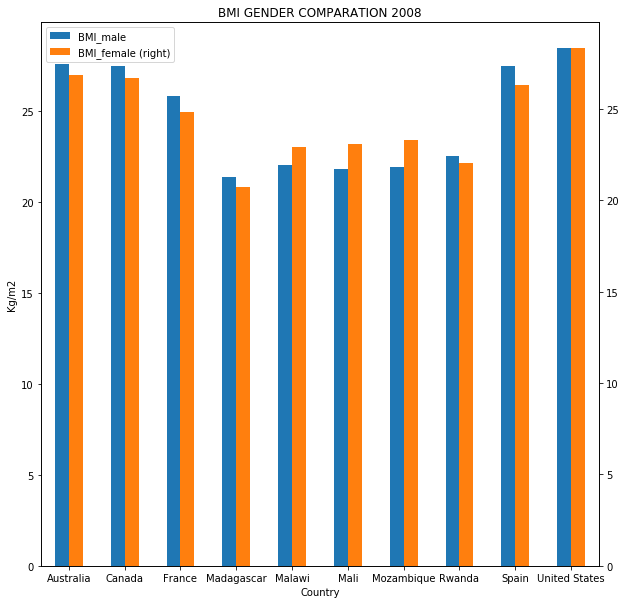

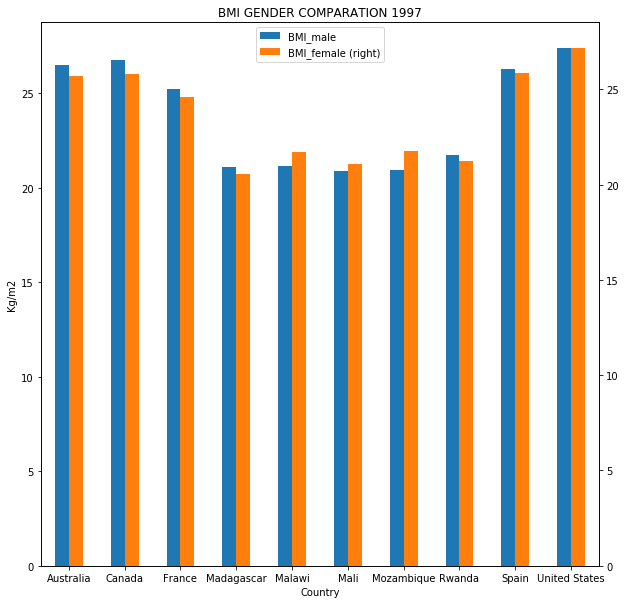

In [16]:
df_BMI_2008= df_countries[df_countries['Year']=='2008'][['Country','BMI_male','BMI_female']]
df_BMI_1997= df_countries[df_countries['Year']=='1997'][['Country','BMI_male','BMI_female']]

df_BMI_2008.plot( x = "Country", kind= 'bar' , secondary_y= 'BMI_female' ,figsize = (10,10),title="BMI GENDER COMPARATION 2008", rot= 0 ).set_ylabel("Kg/m2")
df_BMI_1997.plot( x = "Country", kind= 'bar' , secondary_y= 'BMI_female' ,figsize = (10,10),title="BMI GENDER COMPARATION 1997", rot= 0 ).set_ylabel("Kg/m2")
plt.show()



The difference between male and femala is not big although we can obseve that values of the female are smaller except in three countries of the botton 30 (Malawi, Mali and Mozambique). In 2008 the differeces are a bit bigger than in 1997.

In order to get more information, we are going to list the main statics for both years and the difference between male and female by grouping all the countries 

In [17]:
print('BMI 1997')
print(df_BMI_1997.describe().assign(diff_col_porc = ((df_BMI_1997.describe()['BMI_male'] - df_BMI_1997.describe()['BMI_female']))/df_BMI_1997.describe()['BMI_male'])*100)
print('-------------------------------------')
print('BMI 2008')
print(df_BMI_2008.describe().assign(diff_col_porc = ((df_BMI_2008.describe()['BMI_male'] - df_BMI_2008.describe()['BMI_female']))/df_BMI_2008.describe()['BMI_male'])*100)

BMI 1997
          BMI_male   BMI_female  diff_col_porc
count  1000.000000  1000.000000       0.000000
mean   2379.400000  2354.042400       1.065714
std     283.671249   249.677463      11.983515
min    2088.000000  2055.008000       1.580077
25%    2110.250000  2133.264000      -1.090582
50%    2349.000000  2317.110500       1.357578
75%    2642.750000  2577.645250       2.463523
max    2739.000000  2715.720000       0.849945
-------------------------------------
BMI 2008
          BMI_male  BMI_female  diff_col_porc
count  1000.000000  1000.00000       0.000000
mean   2465.300000  2451.69690       0.551783
std     293.914595   246.38752      16.170369
min    2140.000000  2073.50100       3.107430
25%    2196.250000  2295.50500      -4.519294
50%    2420.000000  2407.34150       0.523079
75%    2748.750000  2660.01025       3.228367
max    2846.000000  2834.35900       0.409030


According to the values and as mentioned above, there is no so much difference (less than 5%) except the standard deviation which is 11% in 1997 and 16% in 2008. As mentioned also, the difference are bigger in 2008 so maybe there is trend of increasing all along the years.

Let's continue with Cholesterol.

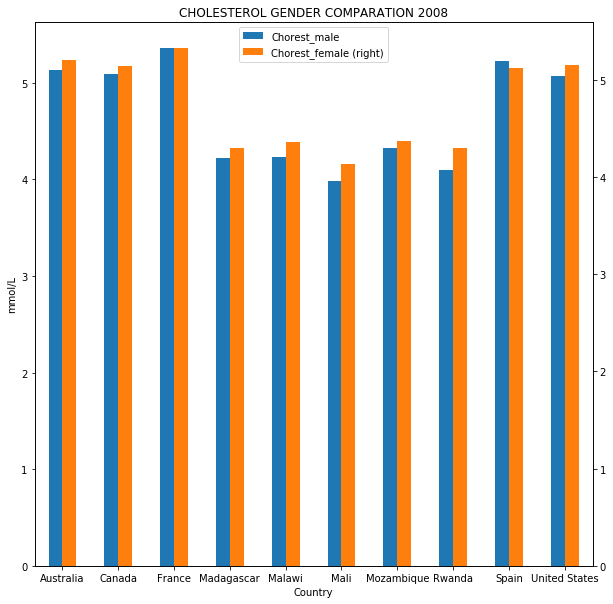

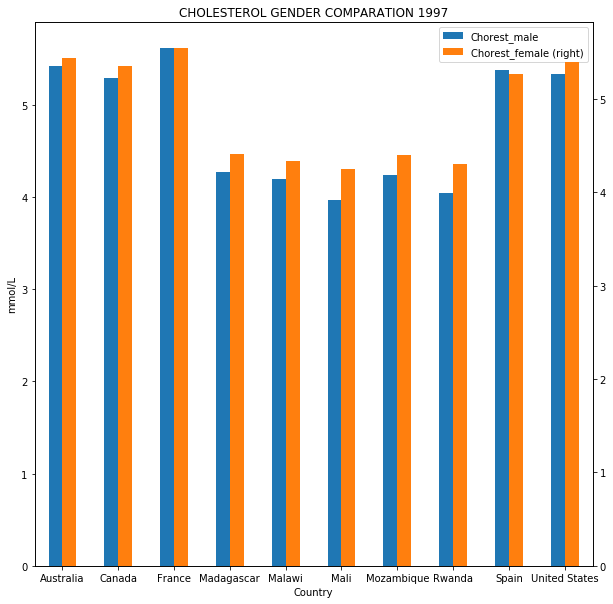

In [18]:
df_Cho_2008= df_countries[df_countries['Year']=='2008'][['Country','Chorest_male','Chorest_female']]
df_Cho_1997= df_countries[df_countries['Year']=='1997'][['Country','Chorest_male','Chorest_female']]

df_Cho_2008.plot( x = "Country", kind= 'bar' , secondary_y= 'Chorest_female' ,figsize = (10,10),title="CHOLESTEROL GENDER COMPARATION 2008", rot= 0 ).set_ylabel("mmol/L")
df_Cho_1997.plot( x = "Country", kind= 'bar' , secondary_y= 'Chorest_female' ,figsize = (10,10),title="CHOLESTEROL GENDER COMPARATION 1997", rot= 0 ).set_ylabel("mmol/L")
plt.show()

In this case, the difference is not big but the trend is that the femele has a higher values of cholesterol in almost all the countries in both top30 and botton30.

Let's have a look at the statics in order to quantify the differences

In [19]:
print('Choresterol 1997')
print(df_Cho_1997.describe().assign(diff_col = ((df_Cho_1997.describe()['Chorest_male'] - df_Cho_1997.describe()['Chorest_female'])/df_Cho_1997.describe()['Chorest_male'])*100))
print('-------------------------------------')
print('Choresterol 2008')
print(df_Cho_2008.describe().assign(diff_col = ((df_Cho_2008.describe()['Chorest_male'] - df_Cho_2008.describe()['Chorest_female'])/df_Cho_2008.describe()['Chorest_male'])*100))


Choresterol 1997
       Chorest_male  Chorest_female   diff_col
count     10.000000       10.000000   0.000000
mean       4.776300        4.868040  -1.920731
std        0.677114        0.564912  16.570564
min        3.968027        4.247283  -7.037654
25%        4.207110        4.348630  -3.363853
50%        4.779206        4.837130  -1.211990
75%        5.366057        5.385407  -0.360609
max        5.615547        5.542596   1.299090
-------------------------------------
Choresterol 2008
       Chorest_male  Chorest_female   diff_col
count     10.000000       10.000000   0.000000
mean       4.673213        4.740862  -1.447591
std        0.542988        0.479599  11.674044
min        3.978563        4.136197  -3.962084
25%        4.222937        4.316135  -2.206941
50%        4.700050        4.748559  -1.032085
75%        5.119457        5.147573  -0.549204
max        5.359544        5.327744   0.593334


We can see that there is no big difference again between male and female Cholesterol values and even less in 2008.

### Question 3: Is there any realtion between Health Expendeture and Life Expectancy?

In order to adress this question, it would be usefull to create a new colum of the total health expendeture per capita, so we are going to create an aditional column by dividing the total health exp by GPD per capita.


In [20]:
#a new column health_expen_per_capita is create in the dataframe 
df_countries = df_countries.assign(health_expen_per_capita=(df_countries['health_expen_perGDP']/100) * df_countries['GDP_percap'])

#check the result
df_countries.tail(10)



,Country,Year,BMI_male,BMI_female,GDP_percap,GNI_percap,life_expectancy,health_expen_perGDP,Chorest_female,Chorest_male,health_expen_per_capita
2439,Australia,2008,27.56,26.87777,25190.72,35920.0,81.6,8.700000,5.202036,5.127870,2191.592640
2463,Canada,2008,27.45,26.69829,26101.76,38490.0,80.8,10.300000,5.141006,5.094217,2688.481280
2489,France,2008,25.85,24.82949,23366.40,34640.0,81.1,11.200000,5.327744,5.359544,2617.036800
2531,Madagascar,2008,21.40,20.73501,265.37,1030.0,62.2,4.500000,4.302161,4.219625,11.941650
2532,Malawi,2008,22.03,22.91455,165.70,790.0,52.4,6.600000,4.358058,4.232875,10.936200
2535,Mali,2008,21.79,23.07655,262.70,970.0,58.5,5.600000,4.136197,3.978563,14.711200
2546,Mozambique,2008,21.94,23.31734,353.76,770.0,54.0,4.100000,4.373212,4.328783,14.504160
2572,Rwanda,2008,22.55,22.07156,328.65,1070.0,64.1,9.400000,4.294538,4.094491,30.893100
2586,Spain,2008,27.50,26.30554,16251.84,32270.0,81.1,8.960119,5.123906,5.224844,1456.184181
2609,United States,2008,28.46,28.34359,38208.76,47320.0,78.3,16.513726,5.149762,5.071318,6309.689824


Once we have the new column, we are going to visualize this data in order to try to find some realation. Only the data without specifying the countries which the data belong to in order to see whether there is any corelation between the indactors itself.

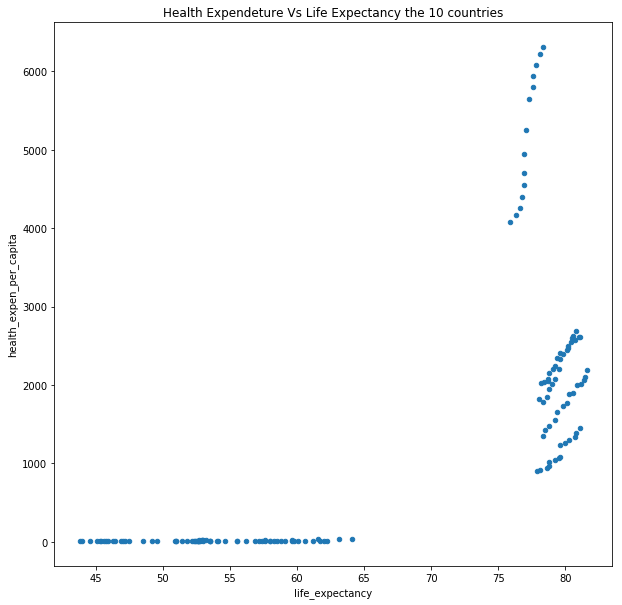

In [21]:
df_countries.plot( x= 'life_expectancy',y= 'health_expen_per_capita', kind= 'scatter',figsize = (10,10),title = "Health Expendeture Vs Life Expectancy the 10 countries", legend =True);


In this scatter plot we can observe that, in general, as much spendings in health more life expectancy. However I find three different blocks which need to analyzed separately in order th get more infomration. 


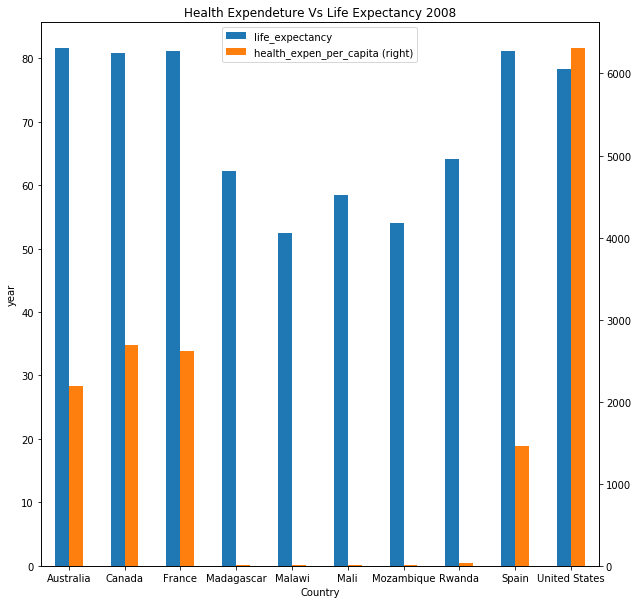

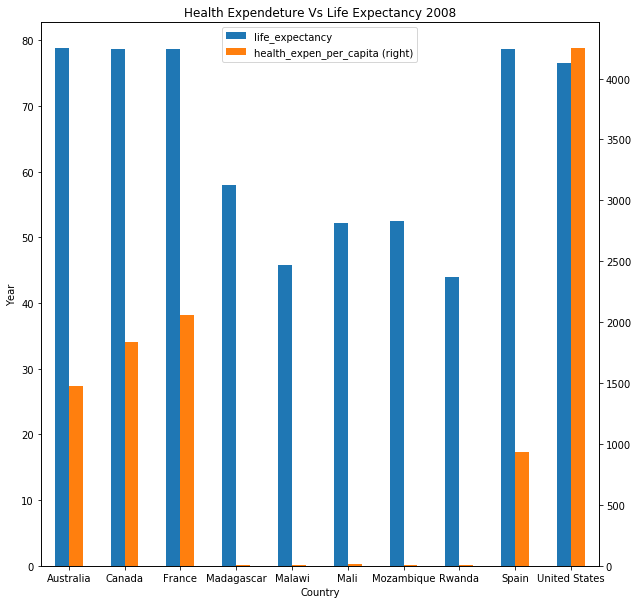

In [22]:
# Chart bar of 2008 data
df_Health_life_2008= df_countries[df_countries['Year']=='2008'][['Country','life_expectancy','health_expen_per_capita']]
df_Health_life_2008.plot( x = "Country", kind= 'bar' , secondary_y= 'health_expen_per_capita' ,figsize = (10,10),title="Health Expendeture Vs Life Expectancy 2008", rot= 0 ).set_ylabel("year")
plt.show()

# Chart bar of 1997 data
df_Health_life_1997= df_countries[df_countries['Year']=='1997'][['Country','life_expectancy','health_expen_per_capita']]
df_Health_life_1997.plot( x = "Country", kind= 'bar' , secondary_y= 'health_expen_per_capita' ,figsize = (10,10),title="Health Expendeture Vs Life Expectancy 2008", rot= 0 ).set_ylabel("Year")
plt.show()

In this bar charts one can see that the countries with more health expendeture have bigger life expentancy although we cannot say that there is causality here because it might depend on many other factors (i.e style of life, obvesity, sedentarity, food etc..)

Regarding the botton30 country we cannot draw any conclusion as the expendeture is too low; only that in the countries with higher rate of expendeture the life expectancy is also higher

One striking thing that it is found is that the expendeture in the United States is more than twice of the rest of the top30 and the life expentacy is even lower so let's explore this point further.


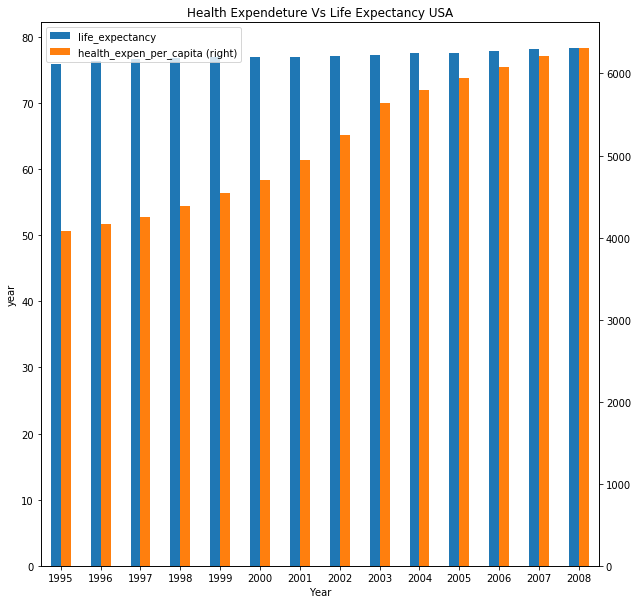

In [23]:
#plot the US data Health Expendeture Vs Life Expectancy

df_Health_life_USA= df_countries[df_countries['Country']=='United States'][['Year','life_expectancy','health_expen_per_capita']]
df_Health_life_USA.plot( x = "Year", kind= 'bar' , secondary_y= 'health_expen_per_capita' ,figsize = (10,10),title="Health Expendeture Vs Life Expectancy USA", rot= 0 ).set_ylabel("year")
plt.show()

We see here that the expendeture in the USA has been increasing since 1995 and and also the life expentancy. However in this chart it is not clear how the life expentancy rises because it is not in the same proportion of the spending.

To be able to see it more precise, we are going to make a line chart with two x axis (Live Vs Expendeture) al along the years.

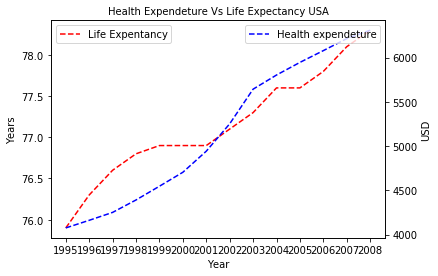

In [24]:
#line chart with two x axis

fig,ax = plt.subplots()
plt.plot(df_Health_life_USA['Year'],df_Health_life_USA['life_expectancy'], '--r', label='Life Expentancy')
plt.legend()
ax.tick_params('vals', colors='r')
plt.ylabel('Years', fontsize=10)
plt.xlabel('Year', fontsize=10)

# Get second axis
ax2 = ax.twinx()
plt.plot(df_Health_life_USA['Year'], df_Health_life_USA['health_expen_per_capita'], '--b', label='Health expendeture')
plt.legend(loc=1)
ax2.tick_params('vals', colors='b')
plt.title('Health Expendeture Vs Life Expectancy USA', fontsize=10)
plt.ylabel('USD', fontsize=10);

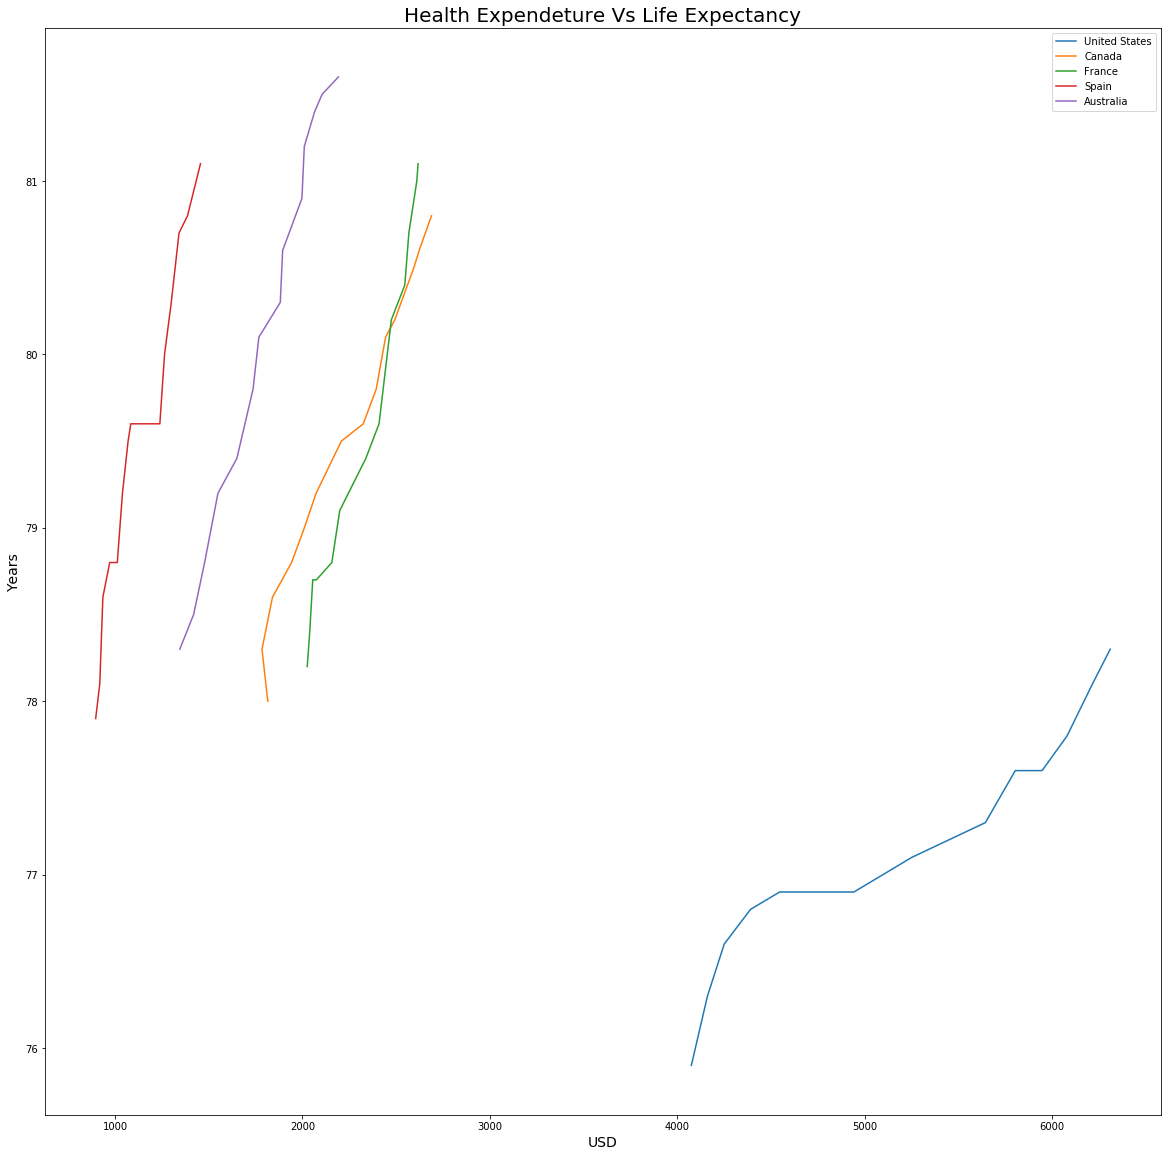

In [25]:
plt.figure(figsize=(20,20))
for e in country_top:
    plt.plot(df_countries[df_countries['Country']== e]['health_expen_per_capita'],df_countries[df_countries['Country']== e]['life_expectancy'] )
plt.legend(countries)
plt.title('Health Expendeture Vs Life Expectancy', fontsize=20)
plt.xlabel('USD', fontsize=14)
plt.ylabel('Years', fontsize=14);


All the countries have similar behavior, the population lives increasingly long lives as health expenditure increases however the USD is a different case. USA spends much more money (3-4 times), and their life expectancy is lower than the rest. This might be for many reasions which would need to be investigated and which are not going to be cover in this project (cost of the health care system, obesitity, style of life etc...) 

<a id='conclusions'></a>
## Conclusions
### General Trends

> - **GNI/year per cap by country:** The trend is to increase year by year with similar slope; This indicator is linked to the growth of the countries so it suppose to follow a upward trajectory. As there was not any meaningful recesion in this period  we could wait for a downward trajectory.

> - **BMI/year by country:** The trend is to increase year by year in all the countries most probably affected by the modern style of life (fast food, processed food,sedentary lifestyle ,etc...) although it would have to be investigated using other indicators which are not cover in this project. There is no significant differences between men and womem.
It Can be also observed that the rich countries has a higher level of BMI in comparation with the pour countries.

> - **Cholesterol in blood /year by country:** In this case the trend is to decrease year by year (downward trajectory) in the rich countries and to increase (upward trajectory) or to remain flat year by year. Again rich countries has a higher level of BMI in comparation with the pour countries

> - **Health expendeture/year per GDP by country:** In general the trend is to increase year by year although the behaviour for the pour countries is a little bit anarchic. Note we have to have in consideration is that this is the spending per GDP so the total expendeture per capita varies drasticaly between rich and pour countries   The range for all the countries (Except USA) are between 5-10% of the GPD. We can observe that USA is spending significantly more than the rest.

> - **Life expectancy/year by country:** The trend is to increase year by year in all the countries. we can also observe that there  is a big difference between the rich and pour countries. The values in the top30 are pretty similar (USA a bit lower) while the values in the pour countries differ significantly.


>One conclusion that we can drawn is that there is a clear correlation between GNI (or GDP) and health indicators 


### Differences by gender in cholesterol and BMI contents

>Based on the investigation we can conclude that there no significant differences between men and women neither in Cholesterol nor BMI content. Only slight differend were found like the women tend to have a little bit more cholesterol in almost all the countries and a little bit less BMI in the rich countries. 

### Realtionship between Health Expendeture and Life Expectancy

>In general we can say that the population lives increasingly long lives as health expenditure increases.

>However it has been found in this  investigation that the behavior of USA differs to the other rich countries. USA has a flatter curve which indicates that the relation between expendeture and life expentancy increase is much lower than the other rich countries. Also it can be observed that the spending by the USA is by far higher than the rest of the rich countries (3-4 times). This might be due to the cost of the US healt care system or maybe due to the style of life or others factors which could be covered and investigated in a further research.

### Limitations


The dataset has only the range of 1995-2008 for all the indicator I have selected for the investigation. Also mentioned that  the health indicators depends on many factors, which has not been analized in this project (i.e style of life, child mortality  hours of sports etc...) to find more appropiate correlations/causalities. 
Also for instance, in the case of USA for Health Expendeture Vs Life Expectancy, we would need to investigate further the health care system costs. It could happen that the cost is higher or the the spending is concentrated in a small portion of the population (richest people) while the life expentancy is taking in consideration the whole population. 